# Particle Swarm Optimization (PSO)

* Algoritmo evolucionário
* Reproduzir comportamento de espécies

<img src = "images/birds.png" width = 800>

## Nearest Neighbor Velocity Matching
* Simular geograficamente o comportamento das espécies
* Copiar características do vizinho mais próximo

<img src="images/NN.png" width = 800>

In [2]:
import numpy as np

### Funções gerais

<img src="images/euclidean.png" width=300>

In [3]:
class Utils:
    # Calcula a distância euclidiana
    @staticmethod
    def euclidean_distance(p1, p2):
        position_1 = np.array(p1.position)
        position_2 = np.array(p2.position)
        distance = np.sqrt(sum((position_1 - position_2)**2))
            
        return distance

### Classe de partículas

<img src = "images/particle.png" width = 400>

In [4]:
class Particle:

    # Construtor: Inicializa a partícula com a quantidade de dimensões especificada e dentro dos limites dados
    def __init__(self, num_dimensions, bounds):
        self.num_dimensions = num_dimensions
        self.position = [] # Posição atual da partícula
        self.velocity = [] # Velocidade atual da partícula
        self.new_velocity = self.velocity # Velocidade que será atualizada
        self.closest = None # Partícula mais próxima
        self.min_dist = np.inf # Distância mínima até a partícula mais próxima (inicialmente infinito)
        self.bounds = bounds # Limites para cada dimensão

        # Para cada dimensão, inicializar a posição e velocidade com valores aleatórios dentro dos limites dados
        for i in range(self.num_dimensions):
            self.position.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))
            self.velocity.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))


    # Representação da partícula    
    def __repr__(self):
        return f"\nPosition {self.position}\nVelocity {self.velocity}\n"


    #  Encontra a partícula mais próxima no enxame (swarm) e atualiza a partícula mais próxima (closest)     
    def find_closest(self, swarm):
        for particle in swarm:
            if particle != self:  # Evitar comparar a partícula consigo mesma
                dist = Utils.euclidean_distance(self, particle) # Calcula a distância euclidiana
                if dist < self.min_dist:  # Se a distância for menor que a distância mínima atual
                    self.min_dist = dist
                    self.closest = particle  # Atualiza a partícula mais próxima


    # Ajusta a nova velocidade baseada na velocidade da partícula mais próxima.
    def adjust_velocity(self):
        if self.closest:
            self.new_velocity = self.closest.velocity  # Nova velocidade é a mesma da partícula mais próxima

    
    # Atualizar a nova velocidade
    def update_velocity(self):
        self.velocity = self.new_velocity
        

    # Aplica a operação 'craziness' na partícula, alterando a sua velocidade para um valor aleatório dentro dos limites
    def apply_craziness(self):
        craziness_velocity = []
        for i in range(self.num_dimensions):
            # Para cada dimensão, gera uma nova velocidade aleatória dentro dos limites da dimensão
            craziness_velocity.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))
        self.velocity = craziness_velocity  # Atualiza a velocidade com os novos valores aleatórios
        

    # Atualiza a posição da partícula somando a sua velocidade à posição atual    
    def update_position(self):
        self.position = list(np.array(self.position) + np.array(self.velocity))

### Classe do enxame

In [5]:
class Swarm:

    # Construtor: Inicializa o enxame com uma lista de partículas
    def __init__(self, particles):
        self.particles = particles

    
    # Percorre todas as partículas e chama as funções para encontrar a partícula mais próxima e ajustar a nova velocidade
    def swarm_closest(self):
        for p in self.particles:
            p.find_closest(self.particles) # Encontra a partícula mais próxima para cada partícula
            p.adjust_velocity() # Ajusta a nova velocidade com base na partícula mais próxima


    # Percorre todas as partículas e chama a função para atualizar a velocidade
    def swarm_update_velocities(self):
        for p in self.particles:
            p.update_velocity() # Atualiza a velocidade de cada partícula com base na nova velocidade calculada


    # Percorre todas as partículas e chama a função para aplicar "craziness"
    def swarm_craziness(self, craziness_threshold):
        for p in self.particles:
           # Se o valor aleatório for menor que o threshold, aplica a "craziness"
           if np.random.uniform(0, 1) < craziness_threshold:
               p.apply_craziness() # Aplica a operação "craziness", ajustando a velocidade aleatoriamente


    # Percorre todas as partículas e chama a função para atualizar a posição
    def swarm_update_positions(self):
        for p in self.particles:
            p.update_position()

    # Calcula a pontuação média do enxame com base na distância mínima de cada partícula
    def swarm_mean_score(self):
        scores = [p.min_dist for p in self.particles] # Coleta a menor distância de cada partícula e coloca em uma lista
        return (sum(scores) / len(scores)) # Retorna a média das distâncias mínimas

### Principal

In [6]:
from plot_utils2 import PlotUtils

CRAZINESS_PROBABILITY = 0.02
NUM_ITERATIONS = 20
NUM_PARTICLES = 100
NUM_DIMENSIONS = 2
BOUNDS = [(-30, 30), (-30, 30)]

if __name__ == "__main__":
    PlotUtils.start_plot()
    score_historic = []

    print("Iniciando ...")

    # Criando as partículas
    particles = []
    for i in range(NUM_PARTICLES):
        particles.append(Particle(NUM_DIMENSIONS, BOUNDS))

    # Criando o enxame com as partículas
    swarm = Swarm(particles)

    print("Iniciando as iterações:")
    i = 0
    while i < NUM_ITERATIONS:
        print(f"Iteração {i}")

        # Atualizando os vizinhos mais próximos e ajustando velocidades
        swarm.swarm_closest()
        swarm.swarm_update_velocities()

        # Aplicando "craziness" de acordo com a probabilidade definida
        swarm.swarm_craziness(CRAZINESS_PROBABILITY)

        # Atualizando posições e calculando a pontuação média
        swarm.swarm_update_positions()

        # Armazenando a pontuação média da iteração
        score_historic.append(swarm.swarm_mean_score())

        for p in swarm.particles:
            PlotUtils.plot_particle(p)
        PlotUtils.plot_iteration(i)

        i += 1

    PlotUtils.save()


Iniciando ...
Iniciando as iterações:
Iteração 0
Iteração 1
Iteração 2
Iteração 3
Iteração 4
Iteração 5
Iteração 6
Iteração 7
Iteração 8
Iteração 9
Iteração 10
Iteração 11
Iteração 12
Iteração 13
Iteração 14
Iteração 15
Iteração 16
Iteração 17
Iteração 18
Iteração 19


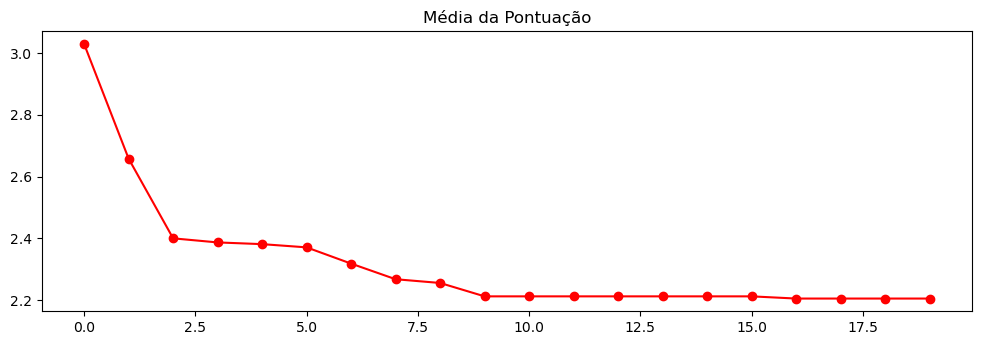

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
plt.subplot(2, 1, 2)
plt.title("Média da Pontuação")
plt.plot(score_historic, marker = 'o', color = 'red')
plt.show()